In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [23]:
# Set your username and token here!
username = 'iregmisid'
#token = 

# Set the datastream and start/enddates
datastream = 'bnfecorsfS20.b1'
startdate = '2025-04-01T00:00:00'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_ecor = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)



[DOWNLOADING] bnfecorsfS20.b1.20250417.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250430.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250411.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250405.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250409.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250424.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250418.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250423.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250420.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250416.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250407.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250404.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250406.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250414.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250410.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250419.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250401.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250403.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250428.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250412.000000.nc
[DOWNLOADING] bnfeco

In [24]:
ds_ecor = act.io.read_arm_netcdf(result_ecor)
ds_ecor

<xarray.Dataset> Size: 983kB
Dimensions:                                 (time: 1437, bound: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 11kB 2025-0...
Dimensions without coordinates: bound
Data variables: (12/146)
    base_time                               (time) datetime64[ns] 11kB 2025-0...
    time_offset                             (time) datetime64[ns] 11kB 2025-0...
    time_bounds                             (time, bound) object 23kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    day_of_year                             (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                            (time) float64 11kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                            (time) float64 11kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                                      ...
    covariance_w_h2o_cov                    (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    covariance_w_ch4_cov                    (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean           (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                     (time) float32 6kB 34.65 ... 34.65
    lon                                     (time) float32 6kB -87.29 ... -87.29
    alt                                     (time) float32 6kB 178.0 ... 178.0
Attributes: (12/17)
    command_line:          ecorsf_ingest -s bnf -f S20 --max-runtime 0
    Conventions:           ARM-1.3
    process_version:       ingest-ecorsf-1.4-0.el9
    dod_version:           ecorsf-b1-1.5
    input_source:          /data/collection/bnf/bnfecorsfS20.00/2025-03-31T23...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1494128
    history:               created by user armflowprod on machine prod-slurmn...
    _file_dates:           ['20250401', '20250402', '20250403', '20250404', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfecorsfS20.b1
    _arm_standards_flag:   1

ConnectTimeout: HTTPSConnectionPool(host='dqr-web-service.svcs.arm.gov', port=443): Max retries exceeded with url: /dqr_full/bnfecorsfS20.b1/20250401/20250430/incorrect,suspect (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f505ba41fd0>, 'Connection to dqr-web-service.svcs.arm.gov timed out. (connect timeout=None)'))

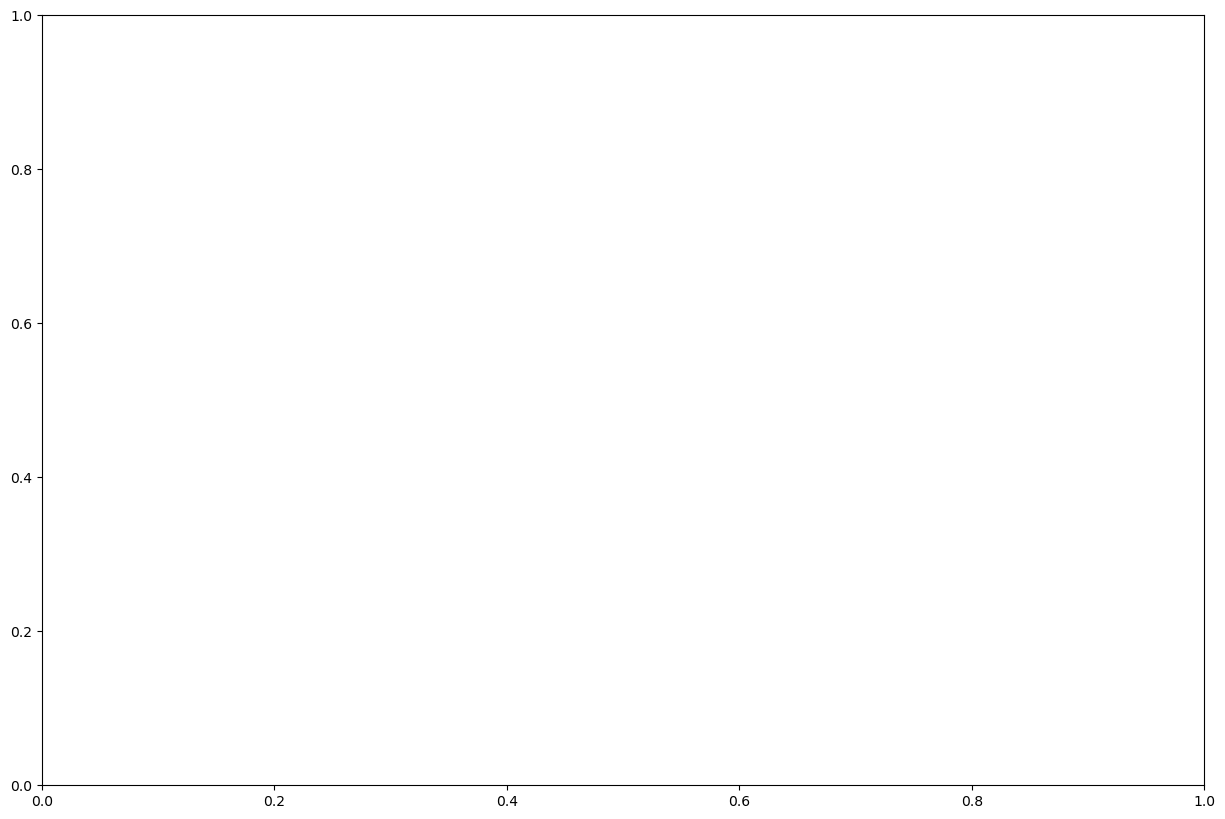

In [30]:
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
co2_flux ='co2_flux'
ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=co2_flux)
display.plot(co2_flux, subplot_index=(0,))
# Add y-axis label with units (e.g., µmol CO₂ m⁻² s⁻¹)
display.axes[0].set_ylabel('CO₂ Flux (µmol m⁻² s⁻¹)')

/opt/conda/lib/python3.11/site-packages/act/plotting/windrosedisplay.py:358: RuntimeWarning: Mean of empty slice
  arr.append(np.nanmean(data[idx]))


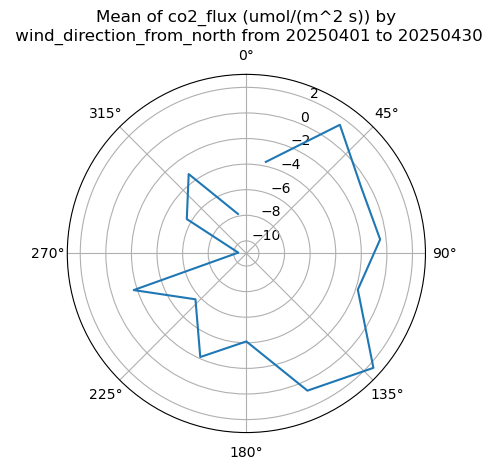

In [26]:
#display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
#wind_direction_from_north ='wind_direction_from_north'
#ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=co2_flux)
#display.plot(wind_direction_from_north)

#rose_plot
display = act.plotting.WindRoseDisplay(ds_ecor)
display.plot_data('wind_direction_from_north', 'mean_wind', 'co2_flux', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show() 



/opt/conda/lib/python3.11/site-packages/act/plotting/windrosedisplay.py:429: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])


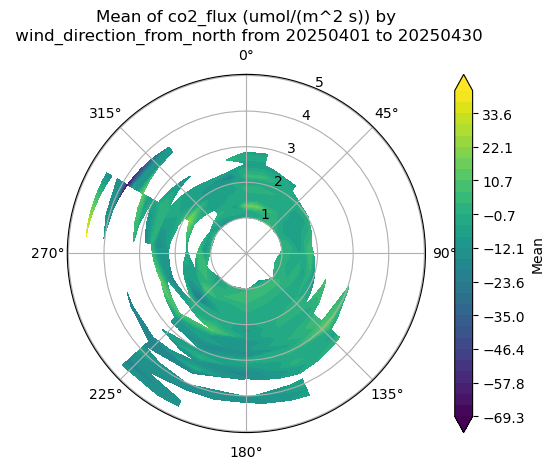

In [27]:
#rose_plot_contour
display = act.plotting.WindRoseDisplay(ds_ecor)
display.plot_data('wind_direction_from_north', 'mean_wind', 'co2_flux', num_dirs=15, plot_type='contour', contour_type='mean')
plt.show() 

<Axes: title={'center': 'bnfecorsfS20.b1 qc_co2_flux on 20250401'}, xlabel='Time [UTC]', ylabel='(1)'>

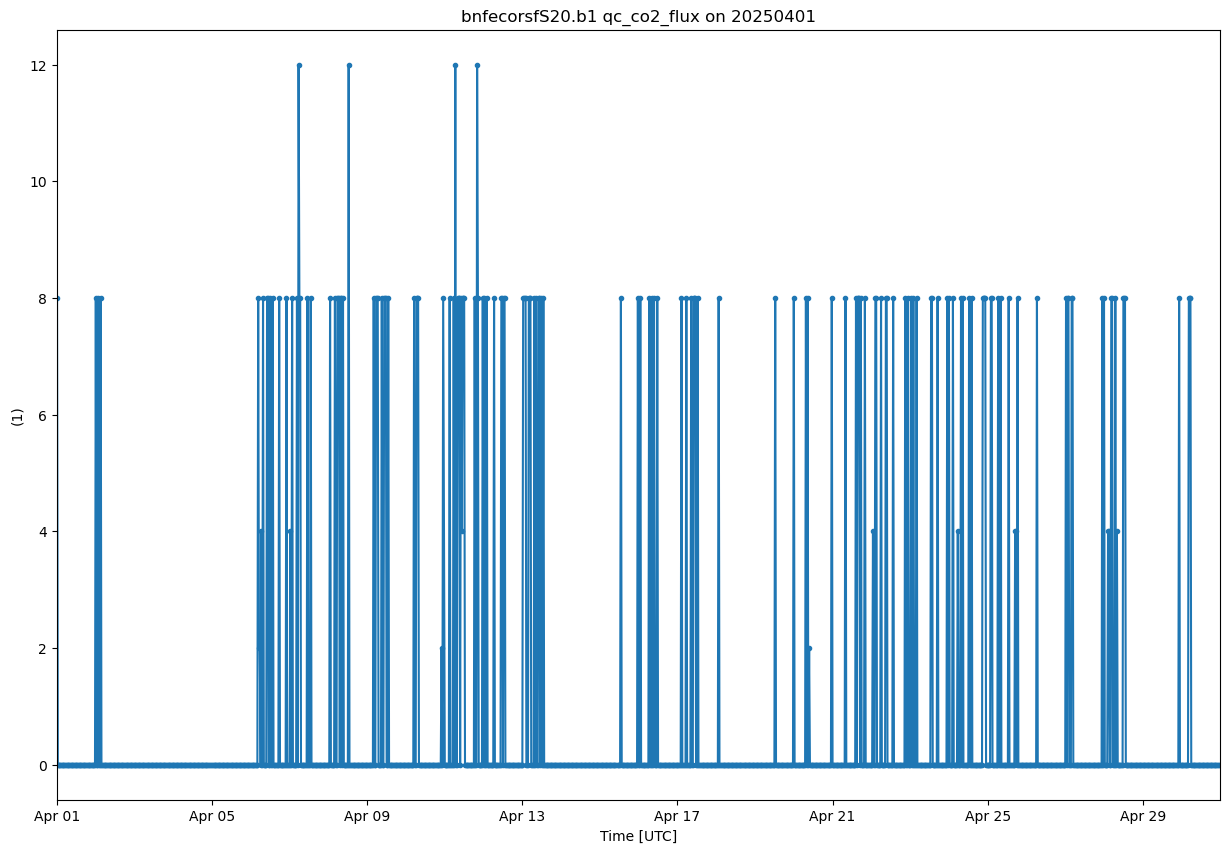

In [28]:
display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
qc_co2_flux ='qc_co2_flux'
display.plot(qc_co2_flux, subplot_index=(0,))




<Axes: title={'center': 'bnfecorsfS20.b1 sensible_heat_flux on 20250430'}, xlabel='Time [UTC]', ylabel='(W/m^2)'>

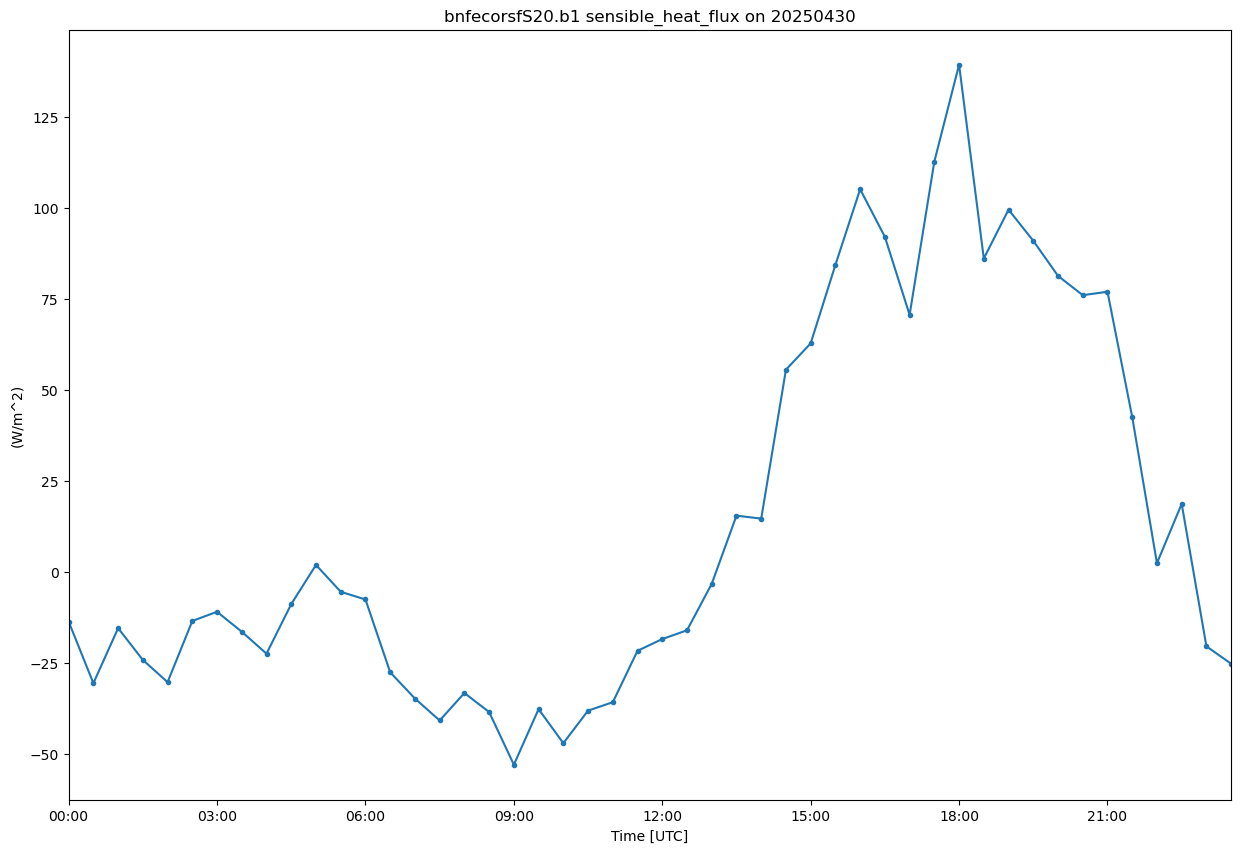

In [17]:
display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
sensible_heat_flux ='sensible_heat_flux'
#ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=sensible_heat_flux)
display.plot(sensible_heat_flux)

In [ ]:
#Rn −G−S=H+LE   (Rn= Net radiation (Total incoming - outgoing radiation at the surface), G = Ground heat flux,  H= Sensible Heat Flux (Air), LE: Evapotranspiration Surface energy balance closure)